# 导入matplotlib

Matplotlib 是 Python 的绘图库，它能让使用者很轻松地将数据图形化，并且提供多样化的输出格式。  
Matplotlib 可以用来绘制各种静态，动态，交互式的图表。

在 Notebook 中，我们可以用下面的方式导入matplotlib。为了解决图表中文显示的问题，我们可以通过pyplot模块的rcParams属性修改配置参数

Pyplot 是 Matplotlib 的子库，提供了和 MATLAB 类似的绘图 API。  
Pyplot 是常用的绘图模块，能很方便让用户绘制 2D 图表。 

In [51]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

> 说明：上面代码中的SimHei和Microsoft YaHei是字体名称，字体的名字都可以在用户主目录下的.matplotlib文件夹下的fontlist-v330.json文件中找到。值得注意的是，使用中文字体后坐标轴上的负号会显示不出来，所以需要将axes.unicode_minus参数设置为False`，这样才能让坐标轴上的负号正常显示。

通过下面的魔法指令，我们可以在绘图时生成矢量图（SVG - Scalable Vector Graphics）

In [52]:
%config InlineBackend.figure_format='svg'

# 绘图的流程

## 创建画布

pyplot模块的`figure`函数可以用来创建画布，创建画布时，可以通过`figsize`参数指定画布的尺寸（默认值是[6.4, 4.8]）；可以通过`dpi`参数设置绘图的分辨率，因为`dpi`代表了每英寸的像素点数量。除此之外，还可以通过`facecolor`参数设置画布的背景色。  
`figure`函数的返回值是一个`Figure`对象，它代表了绘图使用的画布，我们可以基于画布来创建绘图使用的坐标系。

In [53]:
plt.figure(figsize=(8, 4), dpi=120, facecolor='darkgrey')

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

## 创建坐标系

可以直接使用pyplot模块的`subplot`函数来创建坐标系，该函数会返回`Axes`对象。  

**subplot(numbRow,numbCol,plotNum)**

`subplot`的前三个参数分别用来指定整个画布分成几行几列以及当前坐标系的索引，这三个参数的默认值都是1。如果需要在画布上创建多个坐标系，就需要使用该函数，否则就直接使用默认的也是唯一的坐标系。

> 1. 如果numRows ＝ 2, numCols ＝ 3, 那整个绘制图表样式为 2*3 的图片区域。 
> 2. 如果 numRows, numCols 和 plotNum 这三个数都小于 10 的话, 可以把它们缩写为一个整数, 例如 subplot(323) 和 subplot(3,2,3) 是相同的。 
> 3. subplot在 plotNum 指定的区域中创建一个轴对象. 如果新创建的轴和之前创建的轴重叠的话，之前的轴将被删除.

也可以通过上面创建的Figure对象的`add_subplot`方法或`add_axes`方法来创建坐标系，前者跟`subplot`函数的作用一致，后者会产生嵌套的坐标系。

在绘图时，如果没有先调用figure函数和subplot函数，我们将使用默认的画布和坐标系。  

<AxesSubplot:>

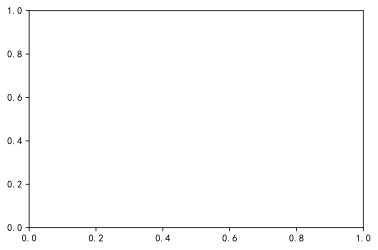

In [54]:
plt.subplot()    # plt.subplot(1,1,1)

## 绘制图像

### 折线图：plot()

如果要绘制折线图，可以使用pyplot模块的`plot`函数，并指定横轴和纵轴的数据。  
折线图最适合用来观察数据的趋势，尤其是当横坐标代表时间的情况下。  
我们可以使用`plot`函数的`color`参数来定制折线的颜色，可以使用`marker`参数来定制数据点的标记（例如：`*`表示五角星，`^`表示三角形，`o`表示小圆圈等），可以使用`linestyle`参数来定制折线的样式（例如：`-`表示实线，`--`表示虚线，`:`表示点线等），可以使用`linewidth`参数来定制折线的粗细。 

下面的代码绘制了一条正弦曲线，其中`marker='*'`会将数据点的标记设置为五角星形状，而`color='red'`会将折线绘制为红色。

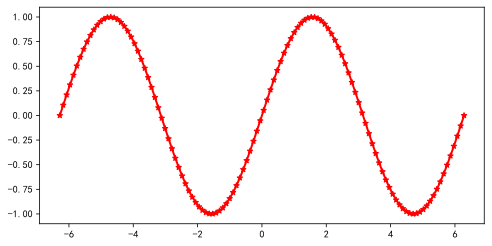

In [55]:
import numpy as np

# 创建画布，使用默认坐标系
plt.figure(figsize=(8,4), dpi=120)
# 绘制折线图
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
y = np.sin(x)
plt.plot(x, y, linewidth=2, marker='*', color='red')
# 显示绘图
plt.show()

在一个坐标系上同时绘制正弦和余弦曲线：

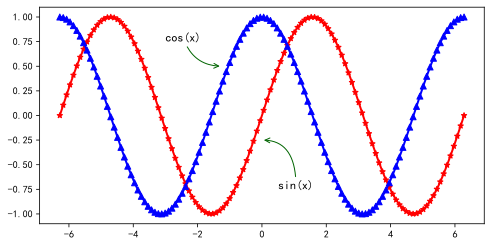

In [56]:
# 创建画布，使用默认坐标系
plt.figure(figsize=(8,4), dpi=120)
# 绘制折线图
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
y1, y2 = np.sin(x), np.cos(x)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
plt.plot(x, y2, linewidth=2, marker='^', color='blue')
# 定制图表的标注，其中的arrowprops是定制箭头样式的参数
plt.annotate('sin(x)', xytext=(0.5, -0.75), xy=(0, -0.25), fontsize=12, arrowprops={
    'arrowstyle': '->', 'color': 'darkgreen', 'connectionstyle': 'angle3, angleA=90, angleB=0'
})
plt.annotate('cos(x)', xytext=(-3, 0.75), xy=(-1.25, 0.5), fontsize=12, arrowprops={
    'arrowstyle': '->', 'color': 'darkgreen', 'connectionstyle': 'arc3, rad=0.35'
})
# 显示绘图
plt.show()

如果要使用两个坐标系分别绘制正弦和余弦，可以用上面提到的subplot函数来创建坐标系，然后再绘图。

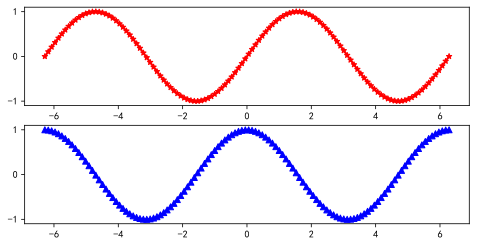

In [57]:
# 创建画布
plt.figure(figsize=(8,4), dpi=120)
# 指定坐标系
plt.subplot(2, 1, 1)
# 绘制折线图
x = np.linspace(-2 * np.pi, 2 * np.pi, 120)
y1, y2 = np.sin(x), np.cos(x)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
# 指定坐标系
plt.subplot(2, 1, 2)
plt.plot(x, y2, linewidth=2, marker='^', color='blue')
# 显示绘图
plt.show()

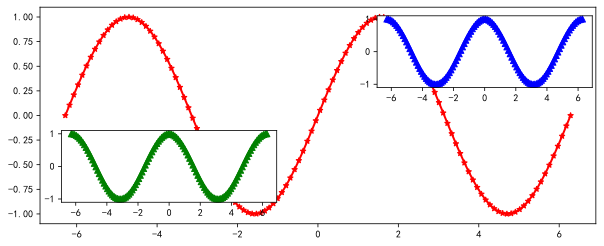

In [58]:
fig = plt.figure(figsize=(10, 4), dpi=120)
plt.plot(x, y1, linewidth=2, marker='*', color='red')
# 用Figure对象的add_axes方法在现有坐标系中嵌套一个新的坐标系
# 该方法的参数是一个四元组，代表了新坐标系在原坐标系中的位置
# 前两个值是左下角的位置，后两个值是坐标系的宽度和高度
ax = fig.add_axes((0.595, 0.6, 0.3,0.25))
ax.plot(x, y2, marker='^', color='blue')
ax = fig.add_axes((0.155, 0.2, 0.3,0.25))
ax.plot(x, y2, marker='^', color='green')
plt.show()

### 散点图：scatter()

散点图可以帮助我们了解两个变量的关系，如果需要了解三个变量的关系，可以将散点图升级为气泡图。  
下面的代码中，x和y两个数组分别表示每个月的收入和每个月网购的支出，如果我们想了解x和y是否存在相关关系，就可以绘制如下所示的散点图。

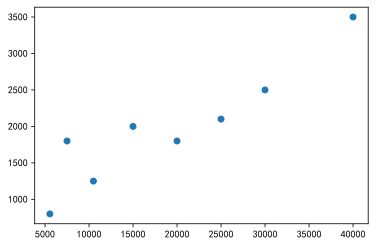

In [59]:
x = np.array([5550,7500,10500,15000,20000,25000,30000,40000])
y = np.array([800,1800,1250,2000,1800,2100,2500,3500])

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y)
plt.show()

### 柱状图：bar()/barh()

在对比数据的差异时，柱状图是非常棒的选择，我们可以使用pyplot模块的bar函数来生成柱状图，也可以使用barh函数来生成水平柱状图。

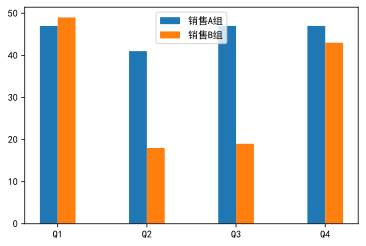

In [60]:
x = np.arange(4)    # 为了控制横坐标的偏移，用数字类型
y1 = np.random.randint(20, 50, 4)
y2 = np.random.randint(10, 60, 4)

plt.figure(figsize=(6, 4), dpi=120)
# 通过横坐标的偏移，让两组数据对应的柱子分开
# width参数控制柱子的粗细，label参数为柱子添加标签
plt.bar(x - 0.1, y1, width=0.2, label='销售A组')
plt.bar(x + 0.1, y2, width=0.2, label='销售B组')
# 定制横轴的刻度
plt.xticks(x, labels=['Q1', 'Q2', 'Q3', 'Q4'])
# 定制显示图例
plt.legend()
plt.show()

绘制堆叠柱状图：

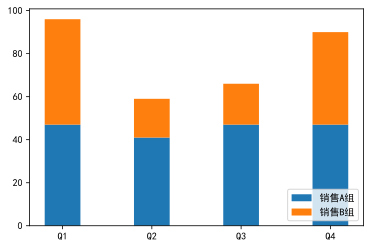

In [61]:
labels = ['Q1', 'Q2', 'Q3', 'Q4']
plt.figure(figsize=(6, 4), dpi=120)
plt.bar(labels, y1, width=0.4, label='销售A组')
# 注意：堆叠柱状图的关键是将之前的柱子作为新柱子的底部
# 可以通过bottom参数指定底部数据，新柱子绘制在底部数据之上
plt.bar(labels, y2, width=0.4, bottom=y1, label='销售B组')
# 定制显示图例
plt.legend(loc='lower right')
plt.show()

### 饼图：pie()

饼图主要用于描述数量、频率等之间的相对关系。在需要展示数据构成的场景下，饼状图、树状图和瀑布图是不错的选择，我们可以使用pyplot模块的pie函数来绘制饼图。

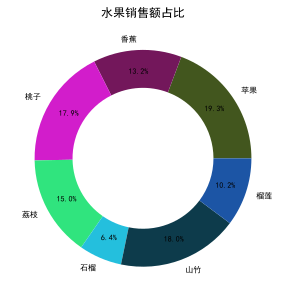

In [62]:
data = np.random.randint(100, 500, 7)
labels = ['苹果', '香蕉', '桃子', '荔枝', '石榴', '山竹', '榴莲']

plt.figure(figsize=(5, 5), dpi=120)
plt.pie(
    data,
    # 自动显示百分比
    autopct='%.1f%%',
    # 饼图的半径
    radius=1,
    # 百分比到圆心的距离
    pctdistance=0.8,
    # 颜色（随机生成）
    colors=np.random.rand(7, 3),
    # 分离距离
    # explode=[0.05, 0, 0.1, 0, 0, 0, 0],
    # 阴影效果
    # shadow=True,
    # 字体属性
    textprops=dict(fontsize=8, color='black'),
    # 楔子属性（生成环状饼图的关键）
    wedgeprops=dict(linewidth=1, width=0.35),
    # 标签
    labels=labels
)
# 定制图表的标题
plt.title('水果销售额占比')
plt.show()

### 直方图：hist()

直方图是一种展示数据分布情况的图形，是一种二维统计图表，它的两个坐标分别是统计样本和该样本对应的某个属性的度量。  
下面的数据是某学校100名男学生的身高，如果我们想知道数据的分布，可以使用pyplot模块的`hist`函数来绘制直方图。

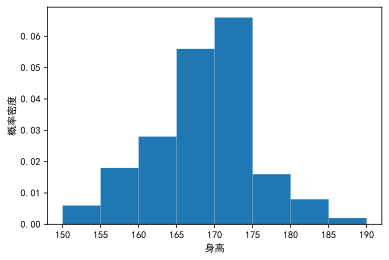

In [63]:
heights = np.array([
    170, 163, 174, 164, 159, 168, 165, 171, 171, 167, 
    165, 161, 175, 170, 174, 170, 174, 170, 173, 173, 
    167, 169, 173, 153, 165, 169, 158, 166, 164, 173, 
    162, 171, 173, 171, 165, 152, 163, 170, 171, 163, 
    165, 166, 155, 155, 171, 161, 167, 172, 164, 155, 
    168, 171, 173, 169, 165, 162, 168, 177, 174, 178, 
    161, 180, 155, 155, 166, 175, 159, 169, 165, 174, 
    175, 160, 152, 168, 164, 175, 168, 183, 166, 166, 
    182, 174, 167, 168, 176, 170, 169, 173, 177, 168, 
    172, 159, 173, 185, 161, 170, 170, 184, 171, 172
])

# 将身高数据分到以下8个组中
bins = np.array([150, 155, 160, 165, 170, 175, 180, 185, 190])

plt.figure(figsize=(6, 4), dpi=120)
# density参数默认值为False，表示纵轴显示频数
# 将density参数设置为True，纵轴会显示概率密度
plt.hist(heights, bins, density=True)
# 定制横轴标签
plt.xlabel('身高')
# 定制纵轴标签
plt.ylabel('概率密度')
plt.show()

### 箱线图：boxplot()

箱线图用于展示一组数据分散情况的统计图表。在箱线图中，箱子的上边界是上四分位数（$Q_3$）的位置，箱子的下边界是下四分位数（$Q_1$）的位置，箱子中间的线条是中位数（$Q_2$）的位置，而箱子的长度就是四分位距离（IQR）。除此之外，箱子上方线条的边界是最大值，箱子下方线条的边界是最小值，这两条线之外的点就是离群值（outlier）。  
所谓离群值，是指数据小于$Q_1 - 1.5 \times IQR$或数据大于$Q_3 + 1.5 \times IQR$的值，公式中的1.5还可以替换为3来发现极端离群值（extreme outlier），而介于1.5到3之间的离群值通常称之为适度离群值（mild outlier）。

可以使用pyplot模块的`boxplot`函数来绘制箱线图：

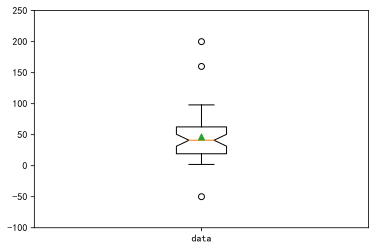

In [64]:
# 数组中有47个[0, 100)范围的随机数
data = np.random.randint(0, 100, 47)
# 向数组中添加三个可能是离群点的数据
data = np.append(data, 160)
data = np.append(data, 200)
data = np.append(data, -50)

plt.figure(figsize=(6, 4), dpi=120)
# whis参数的默认值是1.5，将其设置为3可以检测极端离群值
# showmeans=True表示在图中标记均值的位置
plt.boxplot(data, whis=1.5, showmeans=True, notch=True)
# 定制纵轴的取值范围
plt.ylim([-100, 250])
# 定制横轴的刻度
plt.xticks([1], labels=['data'])
plt.show()

## 显示或保存图像

可以使用pyplot模块的`show`函数来显示绘制的图表。如果希望保存图表，可以使用`savefig`函数。  
需要注意的是，如果要同时显示和保存图表，应该先执行`savefig`函数，再执行`show`函数，因为在调用`show`函数时，图表已经被释放，位于`show`函数之后的`savefig`保存的只是一个空白的区域。

In [65]:
plt.savefig('chart.png')
plt.show()

<Figure size 432x288 with 0 Axes>